**第 1 章 - 机器学习概览**

*这些代码用于生成第1章的一些图表。*

## 配置

首先，让我们看看此 notebook 能否兼容 python2 和 python3 环境，通过导入几个常用的模块，确保 MatplotLib 以内联的方式绘图，然后准备一个函数来保存图表：

In [1]:
# 引入以下模块以同时兼容 python2 和 python3
from __future__ import division, print_function, unicode_literals

# 引入常用模块
import numpy as np
import os

# 确保此 notebook 稳定运行
np.random.seed(42)

# 设置绘图格式
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 保存图表
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'fundamentals'

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID, fig_id + '.png')
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 忽略无用的警告信息
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

## 例 1-1

此函数只用作合并 `datasets/lifesat/oecd_bli_2015.csv` 和 `datasets/lifesat/gdp_per_captita.csv` 中的数据。这将会冗长而繁琐，并且这并不属于机器学习，这也是我没将它写进书中的原因。

本书中代码用到的数据文件在当前目录中，我只是对它进行了调整，来获取 `datasets/lifesat`

In [2]:
# 清洗数据 (本章后续会详细介绍)
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    
    gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
    gdp_per_capita.set_index('Country', inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, left_index=True, right=gdp_per_capita, right_index=True)
    full_country_stats.sort_values(by='GDP per capita', inplace=True)

    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [3]:
import os

# 设置数据的储存路径
datapath = os.path.join('datasets', 'lifesat', '')

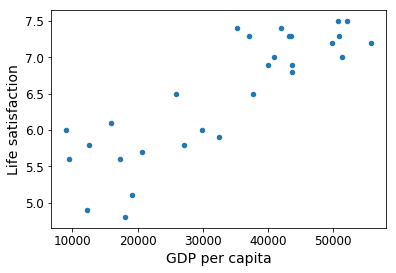

[[5.96242338]]


In [4]:
# 例子
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 加载数据
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

# 清洗数据
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

# 合并数据
# np.r_是按列连接两个矩阵, 要求列数相等
# np.c_是按行连接两个矩阵, 要求行数相等
x = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# 可视化数据
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

# 创建线型模型
model = sklearn.linear_model.LinearRegression()

# 训练模型
model.fit(x, y)

# 预测塞浦路斯地区的情况
x_new = [[22587]]
print(model.predict(x_new))

---

## 注： 你可以忽略此 notebook 剩下的部分，那些只是生成一些本章的图表

---

## 加载并清洗 Life satisfaction 数据

如果你愿意，你可以从 OECD 的网站获取最新数据。从 [http://stats.oecd.org/index.aspx?DataSetCode=BLI](http://stats.oecd.org/index.aspx?DataSetCode=BLI) 下载 CSV 文件，然后保存到 `datasets/lifesat/` 中。

In [5]:
# 从 csv 文件读取数据, 以逗号为分隔符
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')

# 提取出 INEQUALITY 字段为 'TOT' 的数据
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']

# 转换为以国家为索引
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')

# 展示前两行数据
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [6]:
# head() 默认展示前 5 行数据
oecd_bli['Life satisfaction'].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

## 加载并清洗 GDP per capita 数据

如上所述，如果你愿意，你可以更新 GDP per capita 数据。从 [http://goo.gl/j1MSKe](http://goo.gl/j1MSKe)(=> imf.org) 下载最新数据，然后保存到 `datasets/lifesat/` 中。（国内自备梯子）

In [7]:
# 读取数据
gdp_per_capita = pd.read_csv(datapath+'gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

# 更改 "2015" 字段名称为 "GDP per capita"
gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)

# 将索引设为 "Country"
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [8]:
# 合并数据集
full_country_stats = pd.merge(left=oecd_bli, left_index=True, right=gdp_per_capita, right_index=True)

# 根据 "GDP per capita" 排序
full_country_stats.sort_values(by='GDP per capita', inplace=True)

full_country_stats.head(2)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0


In [9]:
# 查询 "United States" 的 "GDP per capita" 和 "Life satisfaction"
full_country_stats[['GDP per capita', 'Life satisfaction']].loc['United States']

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [10]:
# 排除的索引值
remove_indices = [0, 1, 6, 8, 33, 34, 35]

# 保留的索引值 (range(36) 与 remove_indices 取差集)
keep_indices = list(set(range(36)) - set(remove_indices))

# 保留的 "GDP per capita" 和 "Life satisfaction" 数据
sample_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

# 排除的 "GDP per capita" 和 "Life satisfaction" 数据
missing_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[remove_indices]

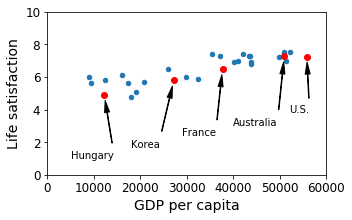

In [11]:
# 设置打印格式 (kind: 图表类型, x: x轴文字, y: y轴文字, figsize: 图表尺寸)
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))

# 图框范围 (x_min, x_max, y_min, y_max)
plt.axis([0, 60000, 0, 10])

# 标注点信息设置
position_text = {
    'Hungary': (5000, 1),
    'Korea': (18000, 1.7),
    'France': (29000, 2.4),
    'Australia': (40000, 3.0),
    'United States': (52000, 3.8),
}

# 画出标注点
for country, pos_text in position_text.items():
    # pos_data_x 为 "GDP per capita", pos_data_y 为 "Life satisfaction"
    pos_data_x, pos_data_y = sample_data.loc[country]
    # 为 "United States" 起别名
    country = 'U.S.' if country == 'United States' else country
    # 设置标注点的参数
    plt.annotate(
        country,
        xy = (pos_data_x, pos_data_y),
        xytext = pos_text,
        arrowprops = dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5)
    )
    # 画出标注点 ("ro" 中的 "r表示红色", "o" 表示圆)
    plt.plot(pos_data_x, pos_data_y, 'ro')

# 保存图片
# save_fig('money_happy_scatterplot')
plt.show()

In [12]:
# 将数据储存为 datasets/lifesat/lifesat.csv
sample_data.to_csv(os.path.join('datasets', 'lifesat', 'lifesat.csv'))

In [13]:
# 查询 position_text 中的国家数据
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


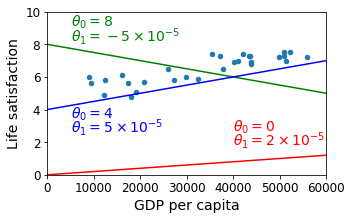

In [14]:
import numpy as np

# 设置打印格式 (kind: 图表类型, x: x轴文字, y: y轴文字, figsize: 图表尺寸)
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))

# 图框范围 (x_min, x_max, y_min, y_max)
plt.axis([0, 60000, 0, 10])

# 返回一个线型的范围数组 (起始值, 结束值, 数组长度), 例如: np.linspace(1, 10, 4) 将返回 [1, 4, 7, 10]
X = np.linspace(0, 60000, 1000)

# plt.plot(x, fx, color)
#   绘制直线, 参数为: 自变量, 函数关系(因变量), 线条颜色
# plt.text(x, y, text)
#   文字标注, 参数为: 文字起始点横坐标, 文字起始点纵坐标, 文字内容
# r'string'
#   原始字符串, 当字符串前面加上 "r" 后, 则该字符串为 "raw string", 其中的 "\" 不会当作转义字符, 常见于正则表达式

plt.plot(X, 2 * X / 100000, 'r')
plt.text(40000, 2.7, r'$\theta_0 = 0$', fontsize=14, color='r')
plt.text(40000, 1.8, r'$\theta_1 = 2 \times 10 ^ {-5}$', fontsize=14, color='r')

plt.plot(X, 8 - 5 * X / 100000, 'g')
plt.text(5000, 9.1, r'$\theta_0 = 8$', fontsize=14, color='g')
plt.text(5000, 8.2, r'$\theta_1 = -5 \times 10 ^ {-5}$', fontsize=14, color='g')

plt.plot(X, 4 + 5 * X / 100000, 'b')
plt.text(5000, 3.5, r'$\theta_0 = 4$', fontsize=14, color='b')
plt.text(5000, 2.6, r'$\theta_1 = 5 \times 10 ^ {-5}$', fontsize=14, color='b')

# save_fig('tweaking_model_params_plot')

plt.show()

In [15]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158483e-05)

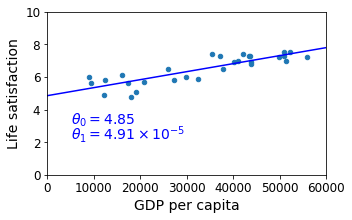

In [16]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
# save_fig('best_fit_model_plot')
plt.show()


In [17]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita)[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.96244744318815

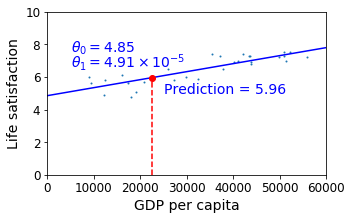

In [18]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
# save_fig('cyprus_prediction_plot')
plt.show()

In [19]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [20]:
(5.1+5.7+6.5)/3

5.766666666666667

In [21]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

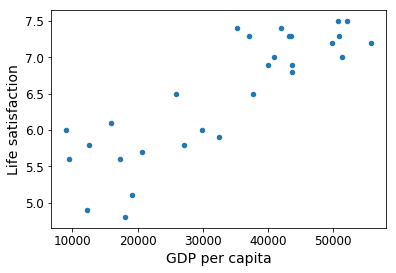

[[5.96242338]]


In [22]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [23]:
oecd_bli, gdp_per_capita = backup

In [24]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [25]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

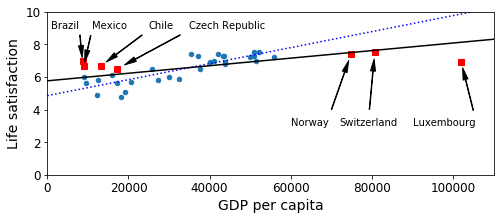

In [26]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

# save_fig('representative_training_data_scatterplot')
plt.show()

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


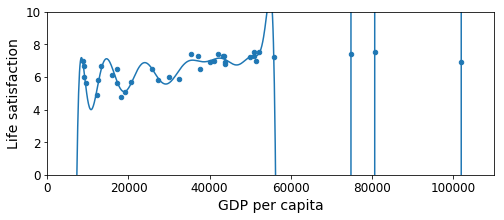

In [27]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
# save_fig('overfitting_model_plot')
plt.show()

In [28]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [29]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


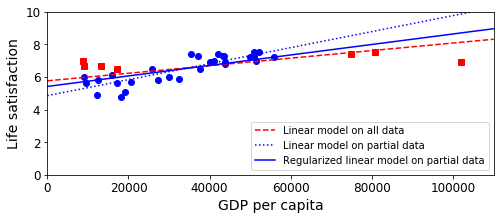

In [30]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
# save_fig('ridge_model_plot')
plt.show()

In [31]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [32]:
# Replace this linear model:
model = sklearn.linear_model.LinearRegression()

In [33]:
# with this k-neighbors regression model:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [34]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = np.array([[22587.0]])  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.76666667]]

[[5.76666667]]
